<font color='blue' size=6><b>Demo - Week 4 Worksheet Suggested Solutions</b></font>

<font color='blue' size=5><b> Suggested solutions to Part 1 (datafile temphr) </b></font>

<font color='blue' size=3> The results of a study of body temperature and heart rate.</font>

In [1]:
install.packages('datasets',repos='https://cran.ma.imperial.ac.uk/')
library(datasets)

Warning message:
"package 'datasets' is not available (for R version 3.6.1)"Warning message:
"package 'datasets' is a base package, and should not be updated"

In [2]:
library(help = "datasets")

In [3]:
getwd()
temphr<-read.table(file="../Data/temphr.txt",sep=',',header = T)

[1] "C:/Users/smaap2/Dropbox/MAT022-Foundations-of-Statistics-and-Data-Science/labsolutions"

In [4]:
summary(temphr)

     tempf            tempc          gender         hr       
 Min.   : 96.30   Min.   :35.72   female:65   Min.   :57.00  
 1st Qu.: 97.80   1st Qu.:36.56   male  :65   1st Qu.:69.00  
 Median : 98.30   Median :36.83               Median :74.00  
 Mean   : 98.24   Mean   :36.80               Mean   :73.76  
 3rd Qu.: 98.70   3rd Qu.:37.06               3rd Qu.:79.00  
 Max.   :100.00   Max.   :37.78               Max.   :89.00  

<font color='blue' size=3>Question 1: Find the sample mean and the sample standard deviation of the temperature variables.</font>

In [10]:
tempf <- temphr[[1]]
tempc <- temphr[[2]]
gender <- temphr[[3]]
hr <- temphr[[4]]

In [11]:
xbarf <- mean(tempf)
sdf<- sd(tempf)
xbarc<-mean(tempc)
sdc<- sd(tempc)

sprintf("Mean temp in centigrade: %.2f", xbarc)
sprintf("Standard deviation of temp in centigrade: %.2f", sdc)
sprintf("Mean temp in farenheit: %.2f", xbarf)
sprintf("Standard deviation temp in farenheit: %.2f", sdf)

[1] "Mean temp in centigrade: 36.80"

[1] "Standard deviation of temp in centigrade: 0.40"

[1] "Mean temp in farenheit: 98.24"

[1] "Standard deviation temp in farenheit: 0.71"

<font color='blue' size=3>Question 2: Examine a histogram of scores on one of the temperature variables. Is the shape of the distribution reasonably close to normal?</font>

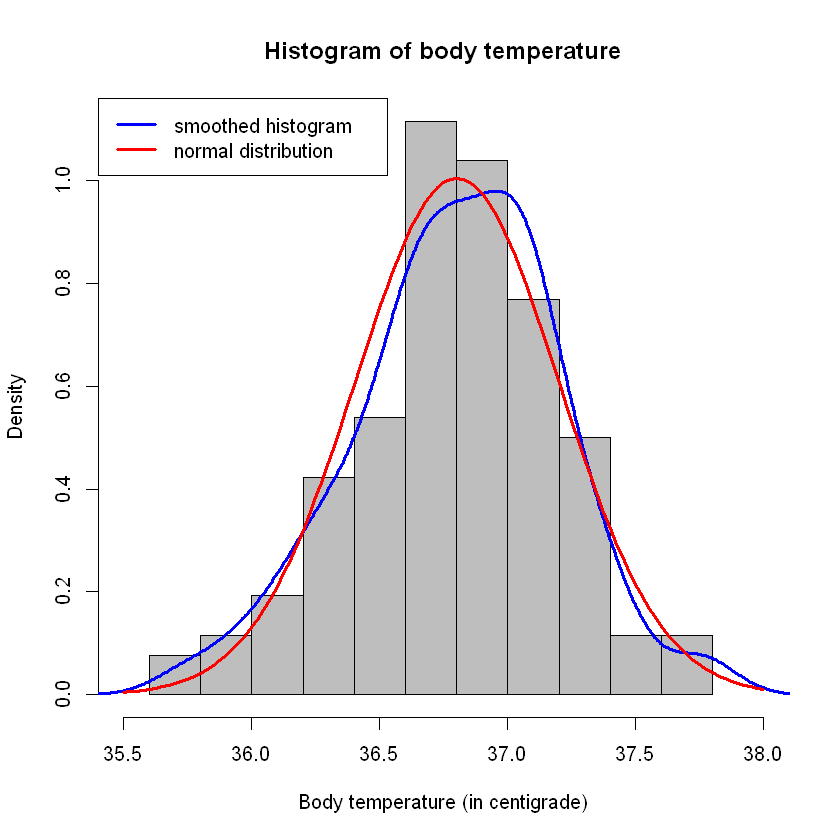

In [12]:
hist(tempc, xlim=c(35.5,38), freq=FALSE, col='grey', 
     xlab="Body temperature (in centigrade)", 
     main="Histogram of body temperature")
lines(density(tempc, adjust=1), col="blue", lwd=3)

x <- seq(35.5,38,,101)
lines(x, dnorm(x, xbarc, sdc), lwd=3 ,col='red')

legend('topleft', 
       c('smoothed histogram', 'normal distribution'), 
       col=c('blue', 'red'), lwd=3)

<font color='blue' size=3>Question 3: Construct a 95% conﬁdence interval for the true mean temperature.</font>

In [13]:
Nsamp <- length(tempc)
Nsamp

[1] 130

In [15]:
alpha<-0.05 

Zval<-qnorm(1-alpha/2,0,1)
Zval

LowBoundCI<- xbarc - Zval * sigma/sqrt(Nsamp)
UpBoundCI <- xbarc + Zval * sigma/sqrt(Nsamp)
 
CI<-c(LowBoundCI, UpBoundCI)
CI

[1] 1.959964

[1] 36.73345 36.86997

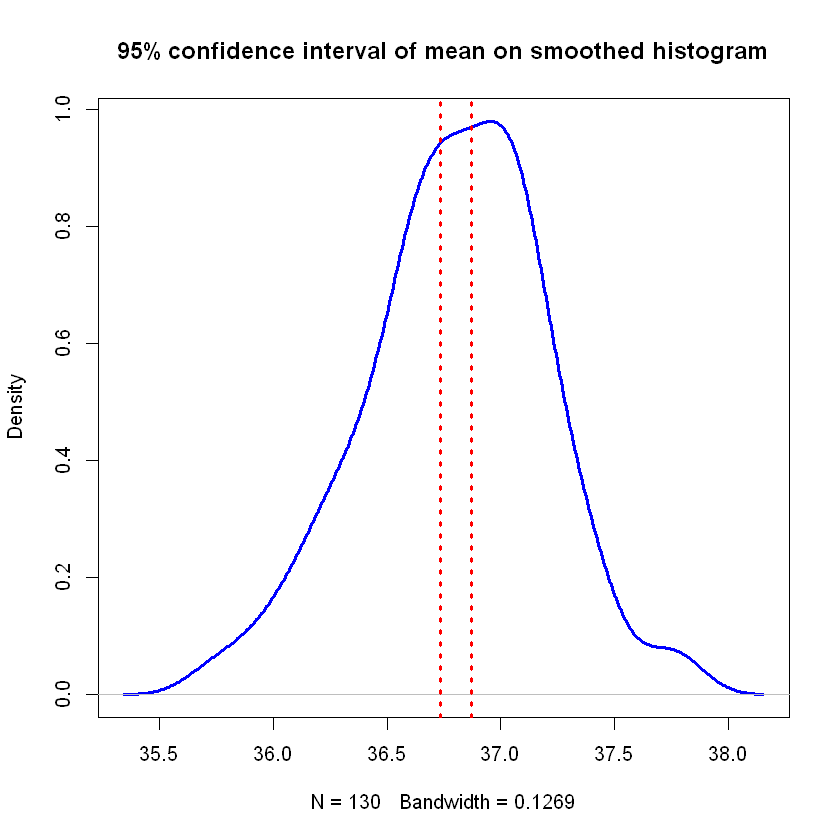

In [16]:
plot(density(tempc, adjust=1), col="blue", lwd=3, 
    main="95% confidence interval of mean on smoothed histogram")

mu<-xbarc
sigma<-sdc
x <- seq(35.5,38,,101)

abline(v=LowBoundCI, lty=3, lwd=3, col='red')
abline(v=UpBoundCI, lty=3, lwd=3, col='red')

<font color='blue' size=3> Question 4: The 'average' body temperature is popularly believed to be 37C. Does the 95% conﬁdence interval based on this sample include this value? What conclusion do you draw from this? </font>

In [ ]:
### here you must discuss what our results tell us about body temperature, this is left for you to think about

<font color='blue' size=3> Question 5: Construct a 80% conﬁdence interval for the true variance of the temperature.</font>

In [37]:
X1oooXn <- rnorm(Nsamp,mu,sigma)

sss2 <- var(X1oooXn)
sss2

[1] 0.164052

In [38]:
VARxCIxComp<-function(SampVec, alpha){
    
    Nsamp<-length(SampVec)
    sss2<- var(SampVec)
    
    LowBound<- (Nsamp-1) * sigma^2 / qchisq(1-alpha/2, df=Nsamp-1) ### see lecture notes for formula
    UpBound <- (Nsamp-1) * sigma^2 / qchisq(alpha/2, df=Nsamp-1)
    
    return(c(LowBound, UpBound))
}

In [39]:
alpha<-0.2

VARxCIxComp(X1oooXn,alpha)

[1] 0.1356255 0.1867846

<font color='blue' size=5><b> Suggested solution to Part 2 (datafile leadcopp) </b></font>

<font color='blue' size=3> A water company periodically tests its supply of drinking water for contaminants such as lead
and copper. The file contains lead and copper levels in water specimens collected from a
sample of 10 households. </font>

In [2]:
getwd()
leadcopp<-read.table(file="../Data/leadcopp.txt",sep=',',header = T)

[1] "C:/Users/C1504359/Dropbox/MAT022-Foundations-of-Statistics-and-Data-Science/labsolutions"

<font color='blue' size=3> Question 1: Construct a 99% confidence interval for the mean lead level in the
water supply, and likewise for the mean copper level in the water supply. Discuss your results. </font>

In [100]:
summary(leadcopp)

      lead             copper      
 Min.   : 0.0000   Min.   :0.1300  
 1st Qu.: 0.7225   1st Qu.:0.2355  
 Median : 1.3200   Median :0.3015  
 Mean   : 2.8856   Mean   :0.4083  
 3rd Qu.: 3.8175   3rd Qu.:0.4998  
 Max.   :13.1000   Max.   :0.9040  

In [111]:
head(leadcopp, n=10)

lead,copper
1.320,0.508
0.000,0.279
13.100,0.320
0.919,0.904
0.657,0.221
3.000,0.283
1.320,0.475
4.090,0.130
4.450,0.220
0.000,0.743


In [102]:
lead <- leadcopp[[1]]
copper <- leadcopp[[2]]
length(lead)
length(copper)

[1] 10

[1] 10

In [103]:
xbarlead <- mean(lead)
sdlead<- sd(lead)
xbarcopper<-mean(copper)
sdcopper<- sd(copper)

sprintf("Mean value of lead levels: %.3f", xbarlead)
sprintf("Standard deviation of lead levels: %.3f", sdlead)
sprintf("Mean value of copper levels: %.3f", xbarcopper)
sprintf("Standard deviation of copper levels: %.3f", sdcopper)

[1] "Mean value of lead levels: 2.886"

[1] "Standard deviation of lead levels: 3.925"

[1] "Mean value of copper levels: 0.408"

[1] "Standard deviation of copper levels: 0.250"

In [104]:
Nsamplead <- length(lead)
Nsampcopper <- length(copper)

In [110]:
### 99% CI for lead levels in water supply 

alpha<-0.01 

ZVal<-qnorm(1-alpha/2,0,1)
ZVal

LeadLowBoundCI<- xbarlead - ZVal * sdlead/sqrt(Nsamplead)
LeadUpBoundCI <- xbarlead + ZVal * sdlead/sqrt(Nsamplead)
 
CILead<-c(LeadLowBoundCI, LeadUpBoundCI)
CILead

[1] 2.575829

[1] -0.3113206  6.0825206

In [107]:
### 99% CI for copper levels in water supply 

alpha<-0.01 

CoppLowBoundCI<- xbarcopper - ZVal * sdcopper/sqrt(Nsampcopper)
CoppUpBoundCI <- xbarcopper + ZVal * sdcopper/sqrt(Nsampcopper)
 
CICopp<-c(CoppLowBoundCI, CoppUpBoundCI)
CICopp

[1] 0.2050549 0.6115451

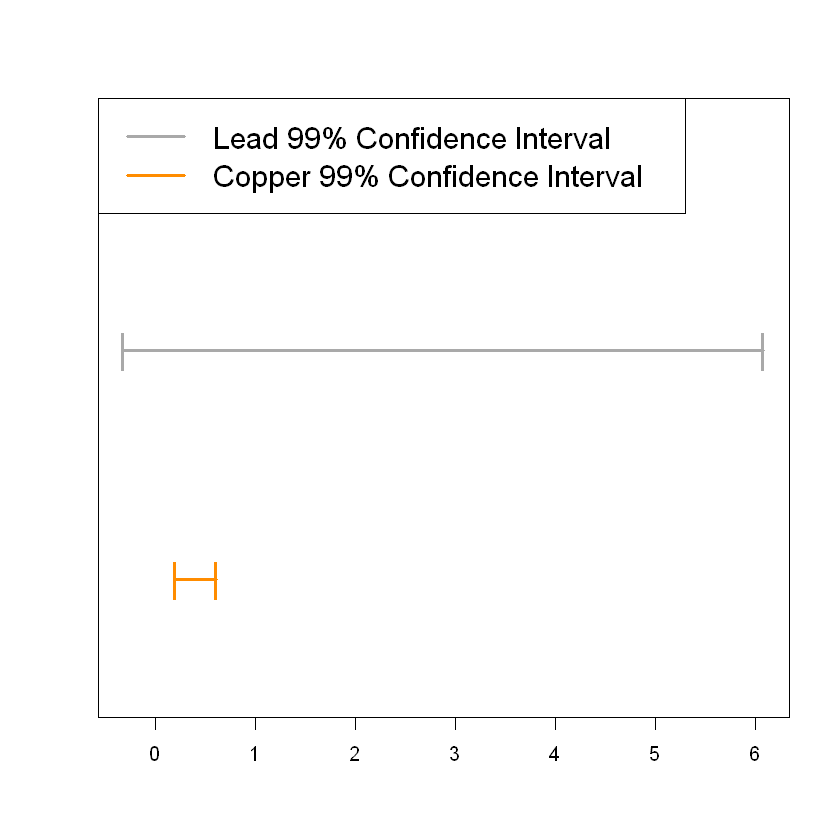

In [109]:
### compare the confidence intervals of copper and lead

XLIM<-c(min(CILead[1],CICopp[1]), max(CILead[2],CICopp[2])) 

plot(c(), xlim=XLIM, ylim=c(0.5,3), 
     yaxt='n', xlab='', ylab='')

lines(CILead, c(2,2), type='l', lwd=3, col='darkgrey')
lines(CICopp, c(1,1), type='l', lwd=3, col='darkorange')

points(CILead, c(2,2), pch='|', col='darkgrey', cex=2) 
points(CICopp, c(1,1), pch='|', col='darkorange', cex=2)

legend('topleft',c('Lead 99% Confidence Interval', 'Copper 99% Confidence Interval'), 
       col=c('darkgrey','darkorange'), lwd=3, cex=1.5, bg='white')

<font color='blue' size=3> Question 2: Construct a 90% confidence interval for the variance of lead level in the water supply, and
for variance of the copper level. </font>

In [98]:
#### 90% CI for the variance of lead in water suply

muL <- xbarlead
sigmaL <- sdlead

X1oooXnLead <- rnorm(Nsamplead,muL,sigmaL)

sssL <- var(X1oooXnLead)
sssL

VARxCIxComp1<-function(SampVec, alpha){
    
    Nsamp<-length(SampVec)
    sssL<- var(SampVec)
    
    LowBound<- (Nsamplead-1) * sigmaL^2 / qchisq(1-alpha/2, df=Nsamplead-1)
    UpBound <- (Nsamplead-1) * sigmaL^2 / qchisq(alpha/2, df=Nsamplead-1)
    
    return(c(LowBound, UpBound))
}

alpha<-0.1

VARxCIxComp1(X1oooXnLead,alpha)

[1] 33.98618

[1]  8.194037 41.693243

In [97]:
#### 90% CI for the variance of copper in water suply

muC <- xbarcopper
sigmaC <- sdcopper

X1oooXnCop <- rnorm(Nsampcopper,muC,sigmaC)

sssC <- var(X1oooXnCop)
sssC

VARxCIxComp2<-function(SampVec, alpha){
    
    Nsamp<-length(SampVec)
    sssL<- var(SampVec)
    
    LowBound<- (Nsampcopper-1) * sigmaC^2 / qchisq(1-alpha/2, df=Nsampcopper-1)
    UpBound <- (Nsampcopper-1) * sigmaC^2 / qchisq(alpha/2, df=Nsampcopper-1)
    
    return(c(LowBound, UpBound))
}

alpha<-0.1

VARxCIxComp2(X1oooXnLead,alpha)

[1] 0.06560675

[1] 0.03311879 0.16851642

<font color='blue' size=5><b> Suggested solution to Part 3 (datafile bulimia) </b></font>

In [70]:
getwd()
bulimia<-read.table(file="../Data/bulimia.txt",sep=',',header = T)

[1] "C:/Users/C1504359/Dropbox/MAT022-Foundations-of-Statistics-and-Data-Science/labsolutions"

<font color='blue' size=3> Two samples of students participated in a psychology experiment. One sample consisted of 11
students known to su↵er from the eating disorder bulimia, while the other sample consisted of
14 students with normal eating habits. Each student completed a questionnaire from which a
fear of negative evaluation (FNE) score was produced (the higher the score, the greater the fear
of negative evaluation). </font>

<font color='blue' size=3> Construct a 95% confidence interval for the mean FNE score of the population of bulimic
students, and likewise for the population of healthy students. </font>

In [71]:
summary(bulimia)

     Group       FNEscore    
 Bulimic:11   Min.   : 6.00  
 Healthy:14   1st Qu.:13.00  
              Median :16.00  
              Mean   :15.76  
              3rd Qu.:20.00  
              Max.   :25.00  

In [72]:
head(bulimia)

Group,FNEscore
Bulimic,21
Bulimic,13
Bulimic,10
Bulimic,20
Bulimic,25
Bulimic,19


In [76]:
bulimic <- bulimia[c(1:11),c(2)]  ### separate data into bulimic and healthy
healthy <- bulimia[c(12:25),c(2)]

NumBul <- length(bulimic)
NumHealth <- length(healthy)

sprintf("Sample size of bulimic students: %.0f", NumBul)
sprintf("Sample size of healthy students: %.0f", NumHealth)

[1] "Sample size of bulimic students: 11"

[1] "Sample size of healthy students: 14"

In [77]:
xbarBul <- mean(bulimic)
sdBul<- sd(bulimic)
xbarHealth<-mean(healthy)
sdHealth<- sd(healthy)

sprintf("Mean FNE score of bulimic students: %.2f", xbarBul)
sprintf("Standard deviation of FNE scores of bulimic students: %.2f", sdBul)
sprintf("Mean FNE score of healthy students: %.2f", xbarHealth)
sprintf("Standard deviation of FNE scores of healthy students: %.2f", sdHealth)

[1] "Mean FNE score of bulimic students: 17.82"

[1] "Standard deviation of FNE scores of bulimic students: 4.92"

[1] "Mean FNE score of healthy students: 14.14"

[1] "Standard deviation of FNE scores of healthy students: 5.29"

In [78]:
### 95% CI for mean FNE score in bulimic students 

alpha<-0.05

ZVal<-qnorm(1-alpha/2,0,1)
ZVal

BulLowBoundCI<- xbarBul - ZVal * sdBul/sqrt(NumBul)
BulUpBoundCI <- xbarBul + ZVal * sdBul/sqrt(NumBul)
 
CIBul <- c(BulLowBoundCI, BulUpBoundCI)
CIBul

[1] 1.959964

[1] 14.91327 20.72309

In [79]:
### 95% CI for mean FNE score in healthy students 

HealthLowBoundCI<- xbarHealth - ZVal * sdHealth/sqrt(NumHealth)
HealthUpBoundCI <- xbarHealth + ZVal * sdHealth/sqrt(NumHealth)
 
CIHealth <- c(HealthLowBoundCI, HealthUpBoundCI)
CIHealth

[1] 11.37214 16.91358

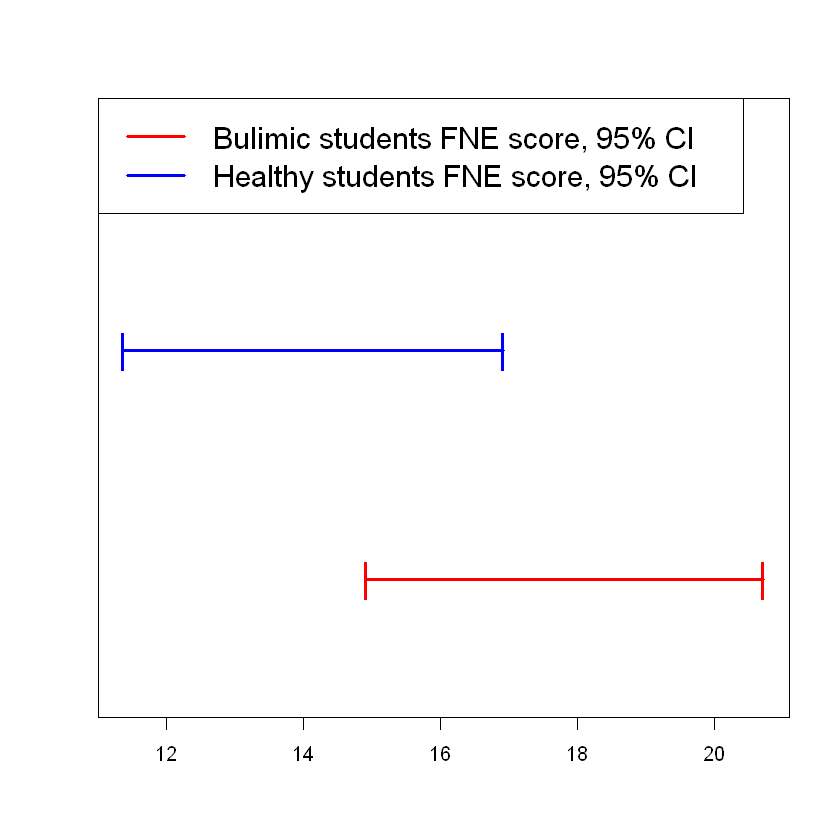

In [81]:
### compare the confidence intervals of bulimic and healthy students

XLIM<-c(min(CIBul[1],CIHealth[1]), max(CIBul[2],CIHealth[2])) 

plot(c(), xlim=XLIM, ylim=c(0.5,3), 
     yaxt='n', xlab='', ylab='')

lines(CIBul, c(1,1), type='l', lwd=3, col='red')
lines(CIHealth, c(2,2), type='l', lwd=3, col='blue')

points(CIBul, c(1,1), pch='|', col='red', cex=2) 
points(CIHealth, c(2,2), pch='|', col='blue', cex=2)

abline(v=mu, lty=3, lwd=3, col='blue')

legend('topleft',c('Bulimic students FNE score, 95% CI', 'Healthy students FNE score, 95% CI'), 
       col=c('red','blue'), lwd=3, cex=1.5, bg='white')

<font color='blue' size=5><b> Suggested solution to Part 4 (datafile ammonia) </b></font>

In [82]:
getwd()
ammonia<-read.table(file="../Data/ammonia.txt",sep=',',header = T)

[1] "C:/Users/C1504359/Dropbox/MAT022-Foundations-of-Statistics-and-Data-Science/labsolutions"

<font color='blue' size=3> In 2001, the journal Environmental Science and Technology published a study on ammonia levels
near the exit of a San Fransisco road tunnel. The file contains the daily ammonia concentrations
(ppm) recorded on eight randomly selected days during the evening rush-hour in the summer of
1999.
Construct a 99% confidence interval for the true mean daily ammonia level nears the tunnel. </font>

In [83]:
summary(ammonia)

      conc      
 Min.   :1.370  
 1st Qu.:1.417  
 Median :1.490  
 Mean   :1.471  
 3rd Qu.:1.515  
 Max.   :1.550  

In [85]:
head(ammonia, n=8)

conc
1.53
1.50
1.37
1.51
1.55
1.42
1.41
1.48


In [91]:
amm <- ammonia$conc

In [92]:
Nsamp <- length(amm)
Nsamp

xbar <- mean(amm)
sd<- sd(amm)

sprintf("Mean value of daily ammonia concentrations: %.2f", xbar)
sprintf("Standard deviation of value daily ammonia concentrations: %.2f", sd)


[1] 8

[1] "Mean value of daily ammonia concentrations: 1.47"

[1] "Standard deviation of value daily ammonia concentrations: 0.06"

In [95]:
### 99% CI for mean FNE score in bulimic students 

alpha<-0.01

ZVal<-qnorm(1-alpha/2,0,1)
ZVal

LowBoundCI<- xbar - ZVal * sd/sqrt(Nsamp)
UpBoundCI <- xbar + ZVal * sd/sqrt(Nsamp)
 
CI <- c(LowBoundCI, UpBoundCI)
CI

[1] 2.575829

[1] 1.41295 1.52955